In [59]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

### Load Data

In [60]:
boston_df = pd.read_csv('datasets/boston.csv')

In [61]:
boston_df.shape

(506, 13)

In [62]:
boston_df.head()

,crime rate,residential land zone,business acres,Charles River,nitric oxides,number of rooms,age,distances to employment centres,accessibility to highways,property-tax,pupil-teacher ratio,lower income levels,Median Home Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [63]:
X = boston_df.drop('Median Home Value', axis = 1)
Y = boston_df['Median Home Value']

### Apply variance filter thresholding
* When a feature doesn’t vary much within itself, it generally has very little predictive power.

In [64]:
X.var(axis = 0)

crime rate                            73.986578
residential land zone                543.936814
business acres                        47.064442
Charles River                          0.064513
nitric oxides                          0.013428
number of rooms                        0.493671
age                                  792.358399
distances to employment centres        4.434015
accessibility to highways             75.816366
property-tax                       28404.759488
pupil-teacher ratio                    4.686989
lower income levels                   50.994760
dtype: float64

In [65]:
from sklearn.feature_selection import VarianceThreshold

select_features = VarianceThreshold(threshold = 8.0)

In [66]:
X_new = select_features.fit_transform(X)

In [67]:
X_new.shape

(506, 7)

In [68]:
var_df = pd.DataFrame({'feature names' : list(X),
                       'variances' : select_features.variances_
                      })

var_df

,feature names,variances
0,crime rate,73.840360
1,residential land zone,542.861840
2,business acres,46.971430
3,Charles River,0.064385
4,nitric oxides,0.013401
5,number of rooms,0.492695
6,age,790.792473
7,distances to employment centres,4.425252
8,accessibility to highways,75.666531
9,property-tax,28348.623600


In [69]:
X_new = pd.DataFrame(X_new)

X_new.head()

,0,1,2,3,4,5,6
0,0.00632,18.0,2.31,65.2,1.0,296.0,4.98
1,0.02731,0.0,7.07,78.9,2.0,242.0,9.14
2,0.02729,0.0,7.07,61.1,2.0,242.0,4.03
3,0.03237,0.0,2.18,45.8,3.0,222.0,2.94
4,0.06905,0.0,2.18,54.2,3.0,222.0,5.33


In [70]:
selected_features = []

for i in range(len(X_new.columns)):
    for j in range(len(X.columns)):

        if(X_new.iloc[:,i].equals( X.iloc[:,j])):
            selected_features.append(X.columns[j])
            
selected_features

['crime rate',
 'residential land zone',
 'business acres',
 'age',
 'accessibility to highways',
 'property-tax',
 'lower income levels']

In [71]:
rejected_features = set(list(X)) - set(selected_features)

rejected_features

{'Charles River',
 'distances to employment centres',
 'nitric oxides',
 'number of rooms',
 'pupil-teacher ratio'}

In [72]:
x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size = 0.2)

In [73]:
x_train.shape, y_train.shape

((404, 7), (404,))

In [74]:
x_test.shape, y_test.shape

((102, 7), (102,))

### Regression in Statsmodel

https://www.statsmodels.org/stable/regression.html

In [75]:
x_train_with_const = sm.add_constant(x_train)

model = sm.OLS(y_train, x_train_with_const)

In [76]:
result = model.fit()

In [77]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:      Median Home Value   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     80.21
Date:                Sun, 10 Mar 2019   Prob (F-statistic):           5.42e-72
Time:                        10:25:11   Log-Likelihood:                -1284.6
No. Observations:                 404   AIC:                             2585.
Df Residuals:                     396   BIC:                             2617.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.3470      1.384     24.808      0.0

### Build Linear Regression Model

In [78]:
reg_model = LinearRegression().fit(x_train, y_train)

### Evaluate Model

In [79]:
print('Training score: ', reg_model.score(x_train, y_train))

Training score:  0.5864157041301283


In [80]:
y_pred = reg_model.predict(x_test)

In [81]:
print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.5854773306078116


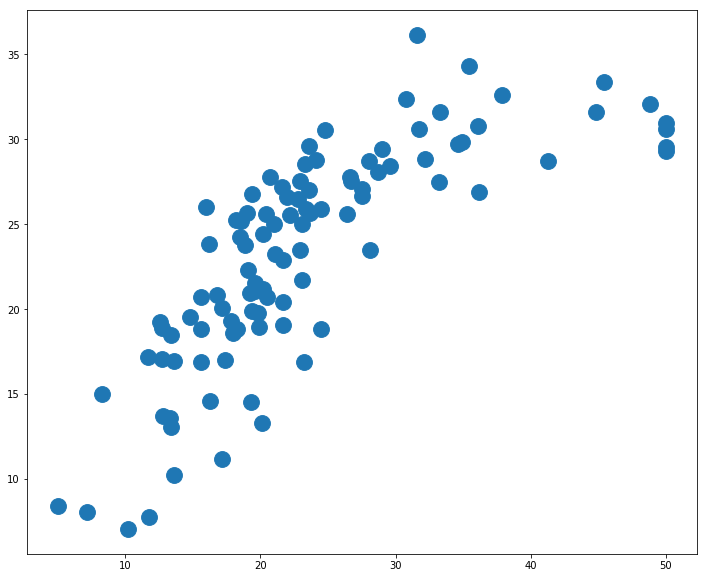

In [82]:
plt.figure(figsize = (12, 10))

plt.scatter(y_test.values, y_pred, s=250)

plt.show()

## Feature Selection for Classification using univariate statistics
* Use Anova and chi2 to select relevant features for building a classification model

In [53]:
import pandas as pd
import numpy as np
import pylab
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [54]:
diabetes_df = pd.read_csv('datasets/diabetes.csv')

In [55]:
diabetes_df.head()

,Pregnancies,Glucose,BP,Skin Thickness,Insulin,Mass,Pedigree,Age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [56]:
X = diabetes_df.drop('class', axis = 1)

y = diabetes_df['class']

In [57]:
X.shape

(768, 8)

In [58]:
X = X.astype(np.float64)

In [59]:
from sklearn.feature_selection import chi2, SelectKBest

select_features = SelectKBest(chi2, k=3)

X_new = select_features.fit_transform(X, y)

In [60]:
X_new.shape

(768, 3)

In [61]:
X_new = X_new.astype(np.float64)

In [62]:
X_new = pd.DataFrame(X_new)

X_new.head()

,0,1,2
0,148.0,0.0,50.0
1,85.0,0.0,31.0
2,183.0,0.0,32.0
3,89.0,94.0,21.0
4,137.0,168.0,33.0


In [63]:
selected_features = []

for i in range(len(X_new.columns)):
    for j in range(len(X.columns)):
        
        if(X_new.iloc[:,i].equals(X.iloc[:,j])):
            selected_features.append(X.columns[j])
            
selected_features

['Glucose', 'Insulin', 'Age']

In [64]:
rejected_features = set(list(X)) - set(selected_features)

rejected_features

{'BP', 'Mass', 'Pedigree', 'Pregnancies', 'Skin Thickness'}

In [65]:
FEATURES = list(diabetes_df.columns[:-1])

FEATURES

['Pregnancies',
 'Glucose',
 'BP',
 'Skin Thickness',
 'Insulin',
 'Mass',
 'Pedigree',
 'Age']

In [71]:
def build_model(target, 
                features, 
                dataset,
                preprocess_fn,
                *hyperparameters):
    
    X = dataset[features]
    Y = dataset[target]

    X = preprocess_fn(X, Y, *hyperparameters)
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    
    model = logistic_fn(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    return {'accuracy': acc, 
            'precision' : prec,
            'recall' : recall}    

In [72]:
def compare_results(result_dict):
    
    for key in result_dict:
        print('Test: ', key)

        print()
        print("accuracy_score : ", result_dict[key]['accuracy'])
        print("precision_score : ", result_dict[key]['precision'])
        print("recall_score : ", result_dict[key]['recall'])
        print()

In [73]:
def visualize_results_kbest(result_dict):
    
    n_components = list(range(0, 8))
    acc = [result_dict[key]['accuracy'] for key in result_dict]

    plt.figure(figsize = (12, 10))
    plt.plot(n_components, acc)

    pylab.ylim([0,1])

    plt.xlabel('n components')
    plt.ylabel('accuracy');

In [74]:
def logistic_fn(x_train, y_train):
    
    model = LogisticRegression(solver = 'liblinear')
    model.fit(x_train, y_train)
    
    return model

## Feature Selection : CHI2
 * Chi2 - Chi-squared stats of non-negative features for classification tasks
 * SelectKBest removes all but the k highest scoring features
 
 https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html

In [75]:
from sklearn.feature_selection import chi2, SelectKBest

def apply_chi2(x, y, k):
    
    select_features = SelectKBest(chi2, k = k)
    x_new = select_features.fit_transform(x, y)
        
    return pd.DataFrame(x_new)

In [76]:
result_dict = {}
    
for i in range (1, 9):
    result_dict['chi2 - ' + str(i)] = build_model('class',
                                                   FEATURES,
                                                   diabetes_df,
                                                   apply_chi2,
                                                   i)

In [77]:
compare_results(result_dict)

Test:  chi2 - 1

accuracy_score :  0.6623376623376623
precision_score :  0.6666666666666666
recall_score :  0.07407407407407407

Test:  chi2 - 2

accuracy_score :  0.7402597402597403
precision_score :  0.6842105263157895
recall_score :  0.48148148148148145

Test:  chi2 - 3

accuracy_score :  0.7467532467532467
precision_score :  0.7419354838709677
recall_score :  0.42592592592592593

Test:  chi2 - 4

accuracy_score :  0.7857142857142857
precision_score :  0.696969696969697
recall_score :  0.5

Test:  chi2 - 5

accuracy_score :  0.7337662337662337
precision_score :  0.7045454545454546
recall_score :  0.5254237288135594

Test:  chi2 - 6

accuracy_score :  0.7727272727272727
precision_score :  0.775
recall_score :  0.543859649122807

Test:  chi2 - 7

accuracy_score :  0.7922077922077922
precision_score :  0.6981132075471698
recall_score :  0.6981132075471698

Test:  chi2 - 8

accuracy_score :  0.8051948051948052
precision_score :  0.7954545454545454
recall_score :  0.625



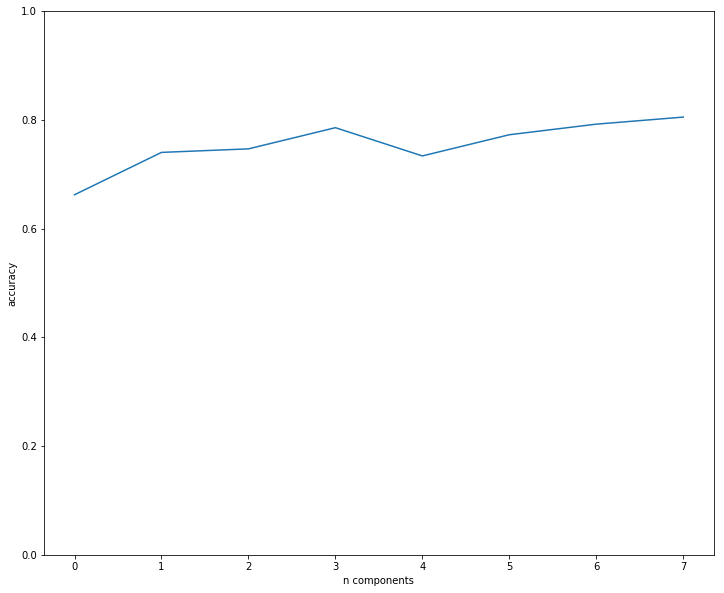

In [78]:
visualize_results_kbest(result_dict)

## Feature Selection : f_classif

 * f_classif - ANOVA F-value between label/feature for classification tasks.
 * SelectKBest removes all but the k highest scoring features
 
 https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif

In [79]:
from sklearn.feature_selection import f_classif

def apply_f_classif(x, y, k):
    
    select_features = SelectKBest(f_classif, k = k)
    x_new = select_features.fit_transform(x, y)
        
    return pd.DataFrame(x_new)

In [80]:
result_dict = {}
    
for i in range (1, 9):
    result_dict['f_classif - ' + str(i)] = build_model('class',
                                                       FEATURES,
                                                       diabetes_df,
                                                       apply_f_classif,
                                                       i)

In [81]:
compare_results(result_dict)

Test:  f_classif - 1

accuracy_score :  0.7272727272727273
precision_score :  0.7222222222222222
recall_score :  0.4482758620689655

Test:  f_classif - 2

accuracy_score :  0.7532467532467533
precision_score :  0.7647058823529411
recall_score :  0.4642857142857143

Test:  f_classif - 3

accuracy_score :  0.7727272727272727
precision_score :  0.6842105263157895
recall_score :  0.5306122448979592

Test:  f_classif - 4

accuracy_score :  0.7727272727272727
precision_score :  0.6808510638297872
recall_score :  0.6153846153846154

Test:  f_classif - 5

accuracy_score :  0.7792207792207793
precision_score :  0.7575757575757576
recall_score :  0.49019607843137253

Test:  f_classif - 6

accuracy_score :  0.7142857142857143
precision_score :  0.7297297297297297
recall_score :  0.4426229508196721

Test:  f_classif - 7

accuracy_score :  0.7922077922077922
precision_score :  0.775
recall_score :  0.5740740740740741

Test:  f_classif - 8

accuracy_score :  0.7922077922077922
precision_score :  0.7

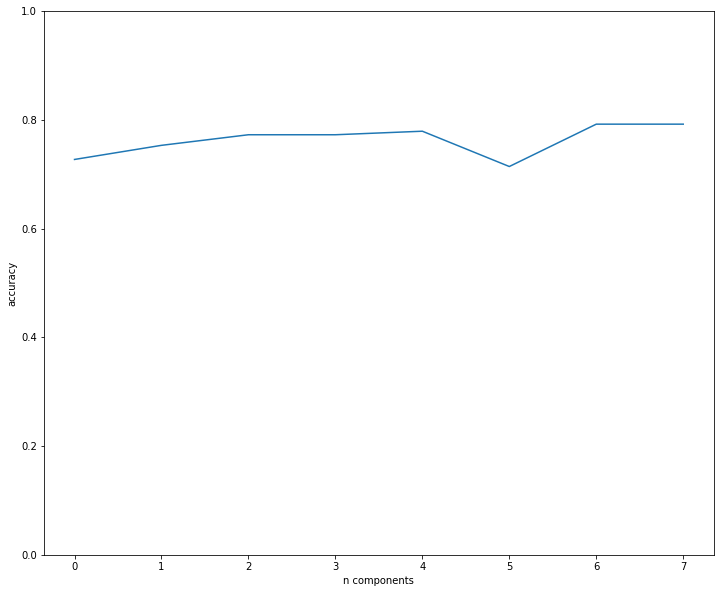

In [82]:
visualize_results_kbest(result_dict)

## Feature Selection : mutual_info_classif

 * mutual_info_classif - Estimate mutual information for a discrete target variable.
 * SelectPercentile removes all but a user-specified highest scoring percentage of features
 
 https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html
 https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html

In [83]:
from sklearn.feature_selection import mutual_info_classif, SelectPercentile

def apply_mutual_info_classif(x, y, percentile):
    
    select_features = SelectPercentile(mutual_info_classif, percentile = percentile)
    x_new = select_features.fit_transform(x, y)
        
    return pd.DataFrame(x_new)

In [84]:
def visualize_results_percentile(result_dict):
    
    n_components = list(range(1, 100, 10))
    acc = [result_dict[key]['accuracy'] for key in result_dict]

    plt.figure(figsize = (12, 10))
    plt.plot(n_components, acc)

    pylab.ylim([0,1])

    plt.xlabel('percentile')
    plt.ylabel('accuracy');

In [85]:
result_dict = {}
    
for i in range(1, 100, 10):
    result_dict['mutual_info_classif percentile - ' + str(i)] = build_model('class',
                                                   FEATURES,
                                                   diabetes_df,
                                                   apply_mutual_info_classif,
                                                   i)

In [86]:
compare_results(result_dict)

Test:  mutual_info_classif percentile - 1

accuracy_score :  0.7662337662337663
precision_score :  0.7714285714285715
recall_score :  0.4909090909090909

Test:  mutual_info_classif percentile - 11

accuracy_score :  0.7727272727272727
precision_score :  0.8064516129032258
recall_score :  0.46296296296296297

Test:  mutual_info_classif percentile - 21

accuracy_score :  0.7792207792207793
precision_score :  0.75
recall_score :  0.48

Test:  mutual_info_classif percentile - 31

accuracy_score :  0.7597402597402597
precision_score :  0.7666666666666667
recall_score :  0.4339622641509434

Test:  mutual_info_classif percentile - 41

accuracy_score :  0.7402597402597403
precision_score :  0.8181818181818182
recall_score :  0.4426229508196721

Test:  mutual_info_classif percentile - 51

accuracy_score :  0.7597402597402597
precision_score :  0.7916666666666666
recall_score :  0.5846153846153846

Test:  mutual_info_classif percentile - 61

accuracy_score :  0.7922077922077922
precision_score :

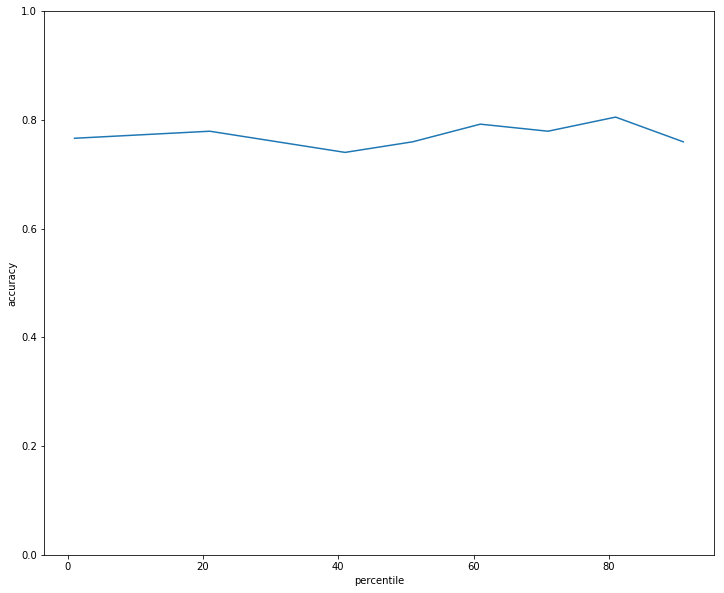

In [87]:
visualize_results_percentile(result_dict)

## Perform dictionary learning (and atom extraction) from the MNIST dataset
 * Dictionary learning finds atoms to form a sparse representation of input data
 * Complex input can be seen as a sparse combination of primitive components.
 * MNIST digits can be seen as a sparse combination of all possible ink strokes.

In [27]:
import matplotlib.pyplot as plt

### Load, Explore and Pre-process Data

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

In [28]:
from sklearn.datasets import load_digits

digits = load_digits()

## Explore Data

In [29]:
digits.data.shape

(1797, 64)

This process can be very long on low-end machines. In such a case,
limit the number of samples to 20 or 30.

In [30]:
sample = digits.data[:40,:]

In [31]:
sample.shape

(40, 64)

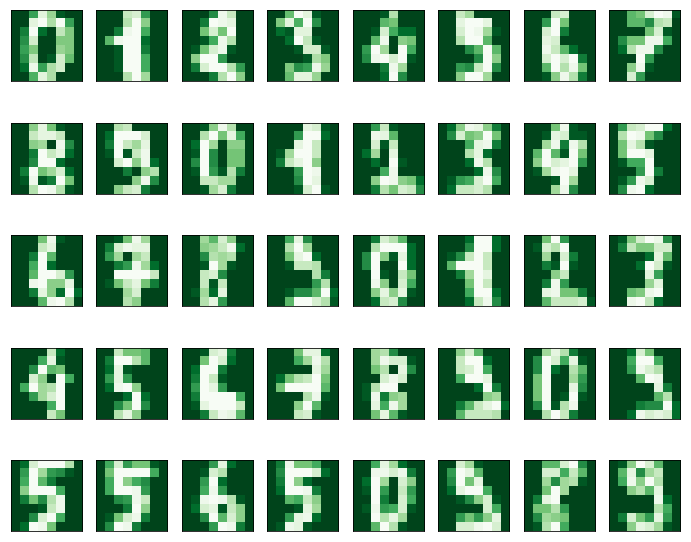

In [32]:
fig = plt.figure(figsize = (12, 10))  

for i in range(40):
    
    ax = fig.add_subplot(5, 8, i + 1, xticks = [], yticks = [])
    ax.imshow(sample[i].reshape(8, 8), cmap = 'Greens_r',interpolation = 'nearest')

## DictionaryLearning
* Finds a dictionary (a set of atoms) that can best be used to represent data using a sparse code.
* n_components : number of dictionary elements to extract
* fit_algorithm : lars uses the least angle regression method to solve the lasso problem 
* transform_algorithm : Algorithm used to transform the data lars: uses the least angle regression method 
* lasso_lars: uses Lars to compute the Lasso solution

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.DictionaryLearning.html

In [33]:
from sklearn.decomposition import DictionaryLearning

dict_learn = DictionaryLearning(n_components = 36, fit_algorithm = 'lars', transform_algorithm = 'lasso_lars')

## fit_transform
Fits transformer to X and y with optional parameters fit_params and returns a transformed version of X.

In [34]:
X_dict = dict_learn.fit_transform(sample)

In [35]:
X_dict.shape

(40, 36)

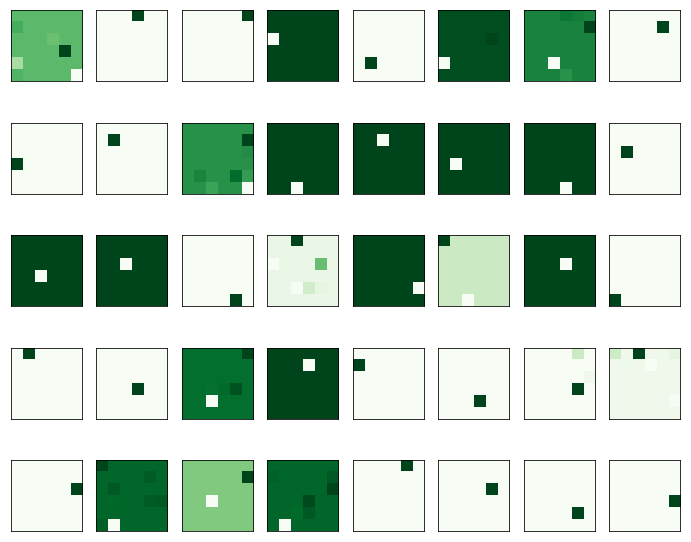

In [36]:
fig = plt.figure(figsize=(12, 10))  

for i in range(40):

    ax = fig.add_subplot(5, 8, i + 1, xticks = [], yticks = [])
    ax.imshow(X_dict[i].reshape(6, 6), cmap = 'Greens_r',interpolation = 'nearest')

## Recreate features from atoms

components_ : array, [n_components, n_features] - dictionary atoms extracted from the data

In [37]:
dict_learn.components_.shape

(36, 64)

In [38]:
X_dict.shape

(40, 36)

In [39]:
import numpy as np

original = np.matmul(X_dict, dict_learn.components_)

In [40]:
original.shape

(40, 64)

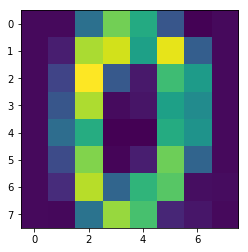

In [42]:
plt.imshow(original[0].reshape(8, 8))

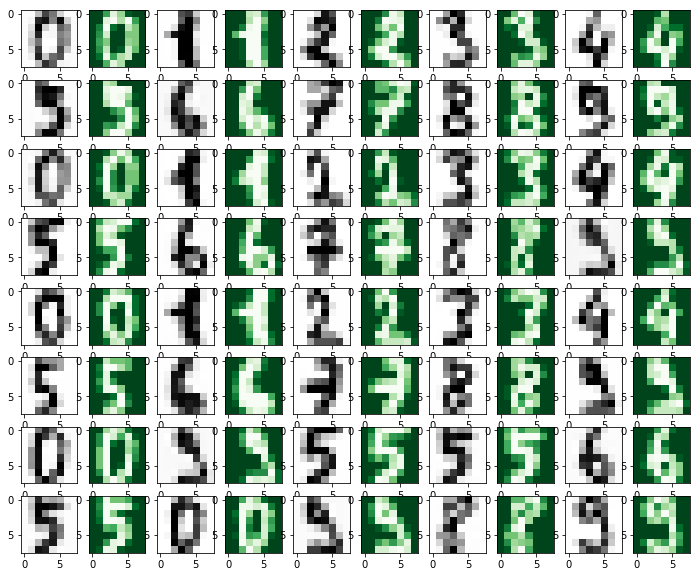

In [43]:
fig = plt.figure(figsize = (12, 10))  
a = 0
b = 0

for i in range(80):
    
    if i%2==0:
        ax = plt.subplot(8, 10, i+1 )
        ax.imshow(original[a].reshape(8, 8), cmap = 'Greys')
        a+=1
    else:
        ax = plt.subplot(8, 10, i+1 )
        ax.imshow(sample[b].reshape(8, 8), cmap = 'Greens_r')
        b+=1

## Feature Selection using PCA


In [1]:
import pylab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm

In [2]:
boston_df = pd.read_csv('datasets/boston.csv')

boston_df.head()

,crime rate,residential land zone,business acres,Charles River,nitric oxides,number of rooms,age,distances to employment centres,accessibility to highways,property-tax,pupil-teacher ratio,lower income levels,Median Home Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [3]:
FEATURES = list(boston_df.columns[:-1])

FEATURES

['crime rate',
 'residential land zone',
 'business acres',
 'Charles River',
 'nitric oxides',
 'number of rooms',
 'age',
 'distances to employment centres',
 'accessibility to highways',
 'property-tax',
 'pupil-teacher ratio',
 'lower income levels']

In [19]:
len(FEATURES)

12

## Apply PCA
* PCA: Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.
* explained_variance_ : The amount of variance explained by each of the selected components.
* components_ : Principal axes in feature space, representing the directions of maximum variance in the data.
* fit_transform : Fit the model with X and apply the dimensionality reduction on X

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [4]:
from sklearn.decomposition import PCA

def apply_pca(X, n, add_constant = False):
    
    pca = PCA(n_components = n)  
    x_new = pca.fit_transform(X)
    
    if add_constant is True:
        x_new = sm.add_constant(x_new)    
        
    return pca, pd.DataFrame(x_new)

In [5]:
pca, _ = apply_pca(boston_df[FEATURES], len(FEATURES))

In [7]:
print("Explained Variance:", pca.explained_variance_ratio_)

Explained Variance: [9.60040728e-01 2.73884414e-02 8.89341069e-03 1.72579506e-03
 9.36295702e-04 5.35816960e-04 3.19581712e-04 1.09868221e-04
 3.93666446e-05 8.58505778e-06 2.00834312e-06 1.02396314e-07]


In [8]:
sum(pca.explained_variance_ratio_)

1.0

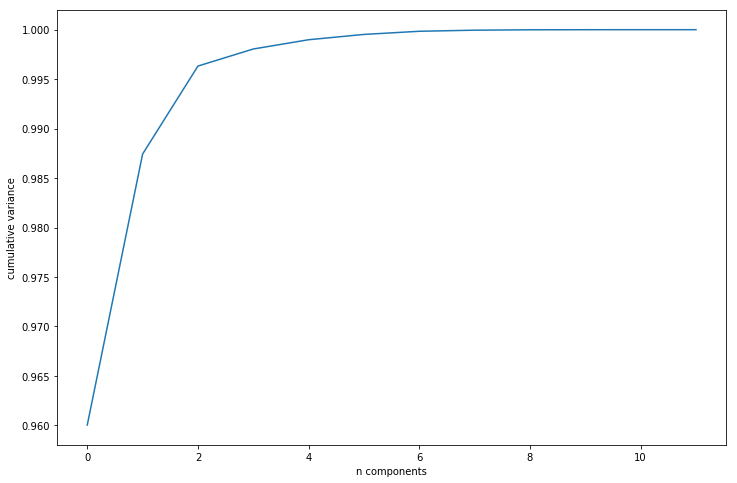

In [20]:
plt.figure(figsize = (12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('n components')
plt.ylabel('cumulative variance');

## Build model

In [21]:
def build_model(regression_fn,                
                target, 
                features, 
                dataset,
                *hyperparameters):
    
    X = dataset[features]
    Y = dataset[target]

    _ , X_new = apply_pca(X, *hyperparameters)

    x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.2)
    
    model = regression_fn(x_train, y_train)
    
    y_pred = model.predict(x_test) 
    
    return {
            'x_initial' : X,
            'x_transform': X_new,
            'x_train' : x_train,
            'x_test'  : x_test, 
            'y_train' : y_train,
            'y_test'  : y_test,
            'y_pred'  : y_pred,
            'model'   : model
           }     

In [22]:
def ols_reg(x_train, y_train):
    
    ols = sm.OLS(y_train, x_train)
    
    model = ols.fit()
    
    return model

In [23]:
def linear_reg(x_train, y_train):
    
    model = LinearRegression().fit(x_train, y_train)
    
    return model

## Statsmodel 

In [14]:
model_params = {}

In [24]:
model_params['statsmodel_reg'] = build_model(ols_reg,
                                            'Median Home Value',
                                            FEATURES,
                                            boston_df,
                                            6,
                                            True)

In [25]:
model       = model_params['statsmodel_reg']['model']
x_initial   = model_params['statsmodel_reg']['x_initial']
x_transform = model_params['statsmodel_reg']['x_transform']
x_train     = model_params['statsmodel_reg']['x_train']
x_test      = model_params['statsmodel_reg']['x_test']
y_train     = model_params['statsmodel_reg']['y_train']
y_test      = model_params['statsmodel_reg']['y_test']
y_pred      = model_params['statsmodel_reg']['y_pred']

### Visualize transformed results

In [26]:
x_transform.shape

(506, 7)

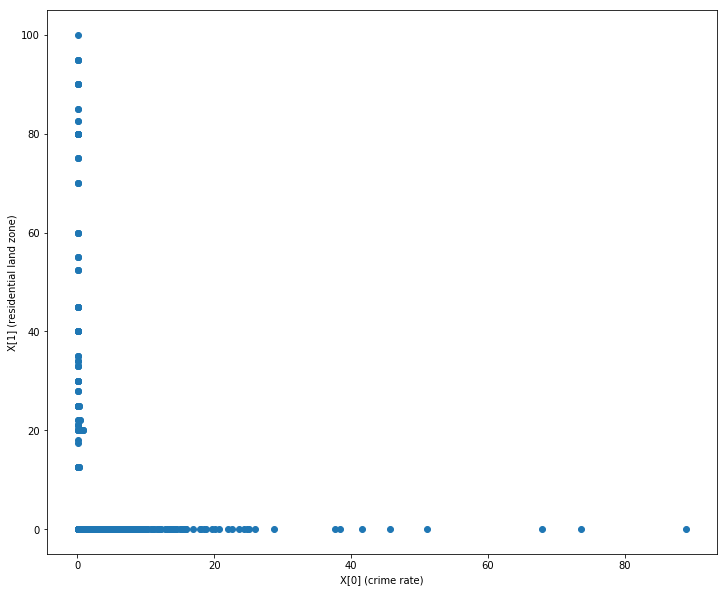

In [27]:
fig, ax = plt.subplots(figsize = (12,10))

ax.scatter(x_initial['crime rate'], x_initial['residential land zone'], cmap = 'Spectral')
plt.xlabel('X[0] (crime rate)')
plt.ylabel('X[1] (residential land zone)');

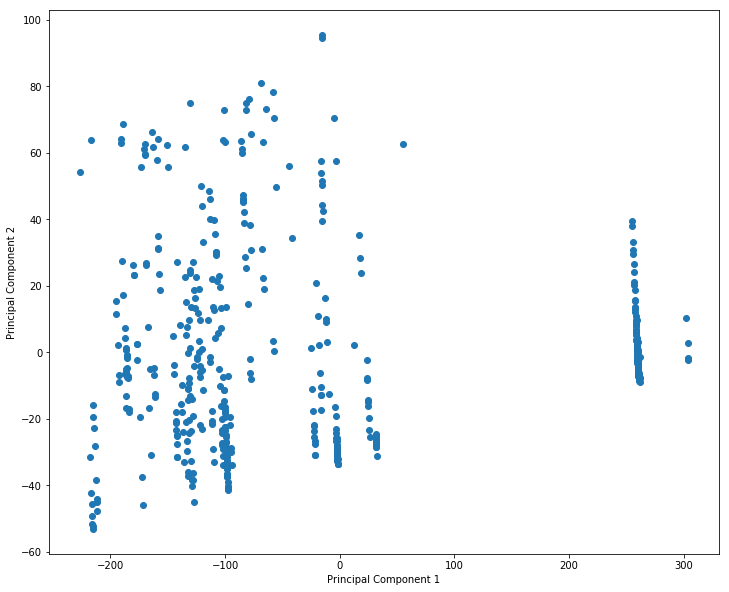

In [28]:
fig, ax = plt.subplots(figsize = (12,10))

ax.scatter(x_transform[1], x_transform[2], cmap = 'Spectral')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2');

In [29]:
print('Rsquared: ', model.rsquared)
print('Adjusted Rsquared: ', model.rsquared_adj)

Rsquared:  0.5878255241683413
Adjusted Rsquared:  0.5815961870021198


## Sklearn Model

In [32]:
model_params['sklearn_reg'] = build_model(linear_reg,
                                          'Median Home Value',
                                           FEATURES,
                                           boston_df,
                                           6)

In [33]:
model       = model_params['sklearn_reg']['model']
x_transform = model_params['sklearn_reg']['x_transform']
x_train     = model_params['sklearn_reg']['x_train']
x_test      = model_params['sklearn_reg']['x_test']
y_train     = model_params['sklearn_reg']['y_train']
y_test      = model_params['sklearn_reg']['y_test']
y_pred      = model_params['sklearn_reg']['y_pred']

In [34]:
x_transform.shape

(506, 6)

In [35]:
print('Training score: ', model.score(x_train, y_train))
print('Testing score: ', r2_score(y_test, y_pred))

Training score:  0.5991266411349765
Testing score:  0.5120368971344347
